# Project: Investigate a Dataset - Medical Appointment No Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<hr>

### Dataset Description 

<hr>

This projects attempts to analyse the [Medical Appointment No Shows dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments).


The dataset provides information about 110,527 medical appointments and has 14 associated variables (characteristics). The No-show variable is the dependent variable. Age is a numerical variable while the others are categorical. The columns provided in the table as explained below:

1. __PatientId:__ This is an identifier for each patient.
2. __AppointmentID:__ This indicates the appointment identification for the patients.
3. __Gender:__ The gender of the patients are also provided as one of either males (M) or females (F).
4. __ScheduledDay:__ This refers to the day the patient is scheduled to their hospital.
5. __AppointmentDay:__ Refers to the day the patient has an appointment to visit the doctor.
6. __Age:__ This is the age of patients
7. __Neighbourhood:__ Refers tp where the appointment takes place.
8. __Scholarship:__ Refers to whether or not the patient is a beneficiary of _Bolsa Família_, government social welfare scheme. It is represented as either 1 (True) or 0 (False) on the dataset. 
9. __Hipertension:__ Column indicates whether or not a patient has Hypertension. It is represented as either 1 (True) or 0 (False) on the dataset.
10. __Diabetes:__ Column indicates whether or not a patient has Diabetes. It is represented as either 1 (True) or 0 (False) on the dataset.
11. __Alcoholism:__ This column indicates if a patient has an issue of alcoholism or not. It is represented as either 1 (True) or 0 (False) on the dataset.
12. __Handcap:__ Shows if a patient is handicapped or not. It is represented as either 1 (True) or 0 (False) on the dataset.
13. __SMS_received:__ Indicates whether or not the patient received one or more messages.
14. __No-show:__ This column indicates whether or not patients turn up for their appointment in the hospital. ___It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.___

### Question(s) for Analysis

<hr>

1. Does having scholarship affect the hospital visits and showing up of patients for appointments.
2. Does having any of the chronic diseases/conditions listed in the description above (hypertension, diabetes,alcoholism) affect the hospital visits and showing up of patients for appointments.
3. Does being handicapped affected turning up for appointments.
4. Does sending out SMS reminder messages to patients influence how they turn up for hospital appointments.
6. Does sex of the patient have any effect on the showing up for hospital appointments
6. What other factors might influence a patient not showing up for their hospital appointments after scheduling such appointments.
7. What is the average duration between scheduled visits and actual hospital appointments and does this affect the show up for appointments.
8. Which neighbourhoods are most likely to miss appointments.
9. What is the average number of patients who missed at least one appointment?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       # Fo visualisation
import matplotlib.pyplot as plt             # For visualisation
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
<hr>

The following steps demonstrate the data wrangling steps i applied on the dataset.

### General Properties


#### General Overview of the Dataset
<hr>

I first loaded the Dataset

The below command loads the dataset as a Pandas DataFrame.
The r (raw) is important because it helps to avoid unicode error when reading or opening the files.

An error may occur if you are using a normal string as a path. 
You can use one of the three following solutions to fix the error problem:

1: Put r before your normal string to convert normal string to raw string:

`pd.read_csv(r"C:\Users\Hp\Documents\Udacity Project 1\noshowappointments-kagglev2-may-2016.csv")`

2: Use double quotes and forward slash character

`pd.read_csv("C:/Users/Hp/Documents/Udacity Project 1/noshowappointments-kagglev2-may-2016.csv")`

3: Doubling the backslashes as shown below.

`pd.read_csv("C:\\Users\\Hp\\Documents\\Udacity Project 1\\noshowappointments-kagglev2-may-2016.csv")`

In [3]:
df = pd.read_csv(r"C:\Users\Hp\Documents\Udacity Project 1\noshowappointments-kagglev2-may-2016.csv")

#### Make a Copy of the DataFrame
<hr>
Before any data wrangling process i would like to create a backup copy of my dataframe (depending on the size of the DataFrame) and name it df1, in case of any unforseen problems or errors. This also gives me an opportunity to quickly revert to checking the original dataset if I am confused about what I did right or wrong.


___N.B. I shall be running my analysis on the original dataframe named df.___

In [4]:
df1 = df.copy(deep = True)

The above cell command creates a copy of my original `df` DataFrame and assigns the name `df1` to it.

Setting an argument `deep = True` ensures a "hard copy" of the dataframe is created and
a soft copy vice versa. The soft copy is akin to assigning the dataframe to a variable. Any changes in one will affect the other.


In [5]:
%who_ls DataFrame

# This code Lists all the Dataframes loaded into memory.

['df', 'df1']

The above code cell output shows that I have successfully created and loaded both `df` and `df1` DataFrames.

To delete any DataFrame, I will just run the `del df1` command.

### To checkout the Dataset 
<hr>
Run the codes below to checkout the dataset so as to have a general overview of the dataset.

##### Check for the number of missing values

One of the very first steps in data wranglung is to check for missing values. We shall attempt to do this by running the cell below. Using a `pd.isnull(df)` command gives a boolean result. We shall call a `sum` method on it to give a count of the missing values (if present).

In [117]:
pd.isnull(df).sum()

Gender                       0
ScheduledDay                 0
AppointmentDay               0
Age                          0
Neighbourhood                0
Scholarship                  0
Hypertension                 0
Diabetes                     0
Alcoholism                   0
Handicapped                  0
SMS_received                 0
Showed_up_for_appointment    0
Delay_time                   0
dtype: int64

Just as seen above, there are no missing values in this dataset. We can thus proceedw with furtherchecking out our dataset.

Checking for number of missing value entries in the dataset is very important.
If there are any missing values, we drop them (if statistically feasible) 
by calling the `df.dropna()` function or we can decide to do otherwise.

#### Let us check the size of the DataFrame

Using the size attribute, assign the size of the DataFrame to a variable named `df_size`.

In [6]:
df_size = df.size
print(df_size)

1547378


The above code cell output shows that the DataFrame has 1, 547, 378 cell values.

##### Checking the Dimension of the Dataset

In [7]:
df_dimension = df.ndim
print(f"The DataFrame dimension is: {df_dimension}")

The DataFrame dimension is: 2


The output of the above cell shows that the DataFrame df is 2-dimensional, having rows and columns. This is to be expected since it is a Pandas DataFrame. If it had returned 1, then we can say it is a Pandas series.

###### Check the Number of Unique Appointments
I will achieve this by counting how many unique patients are in the DataFrame:

In [8]:
len(df['PatientId'].unique())

62299

The above result indicates that there are 62, 299 unique patient visits. This shows that some visits were return visits, meaning some patients had more than one appointments.

In [9]:
len(df['AppointmentID'].unique())

110527

The above code cell output of 110, 527 corresponds to the total number of patients seen as mentioned above in the introduction above.

In [10]:
df.head() # Checkout the first 5 entries in the DataFrame.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Insights from the above analysis

1. There are 14 columns in the dataset.

In [11]:
df.tail() # Checkout the last 5 entries in the DataFrame.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [12]:
df.sample(10) # Checkout the random 10 entries in the DataFrame.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
93424,5.221574e+13,5757773,M,2016-06-01T09:48:31Z,2016-06-01T00:00:00Z,2,SÃO JOSÉ,0,0,0,0,0,0,No
6289,2.227669e+12,5648025,F,2016-05-02T14:54:35Z,2016-05-04T00:00:00Z,47,JARDIM CAMBURI,0,0,0,0,0,0,Yes
4718,5.681234e+14,5687283,F,2016-05-11T15:15:35Z,2016-05-16T00:00:00Z,36,RESISTÊNCIA,0,0,0,0,0,0,No
2204,2.426683e+12,5641336,F,2016-04-29T13:21:00Z,2016-04-29T00:00:00Z,49,DO CABRAL,0,1,0,0,0,0,No
91895,1.363977e+13,5680656,F,2016-05-10T12:21:12Z,2016-06-01T00:00:00Z,33,JARDIM DA PENHA,0,0,0,0,0,1,No
27797,2.644727e+12,5719555,F,2016-05-19T11:33:36Z,2016-05-25T00:00:00Z,16,ITARARÉ,0,0,0,0,0,1,No
52873,2.915678e+13,5736214,M,2016-05-25T08:03:47Z,2016-05-25T00:00:00Z,39,SÃO JOSÉ,0,0,0,0,0,0,No
42816,1.499929e+12,5729778,F,2016-05-24T07:50:04Z,2016-05-24T00:00:00Z,5,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
51565,8.249496e+12,5720459,F,2016-05-19T13:51:47Z,2016-05-19T00:00:00Z,46,PIEDADE,0,0,0,0,0,0,No
51479,3.357126e+11,5681056,M,2016-05-10T13:29:46Z,2016-05-10T00:00:00Z,0,PIEDADE,0,0,0,0,0,0,No


The dates are given in `ISO-8601` date representation style. In addition AppointmentDays are fixed at time T00:00:00Z

In [13]:
df.dtypes # Check the data types

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [14]:
df.index  # Show the total number of rows index

RangeIndex(start=0, stop=110527, step=1)

In [15]:
df.shape  # Shows the total number of rows and columns in the dataset

(110527, 14)

In [16]:
df_row_count, df_column_count = df.shape
print(f"The DataFrame has {df_row_count} rows and {df_column_count} columns.")

The DataFrame has 110527 rows and 14 columns.


In [17]:
df.columns  # Shows the names of the column headers/titles

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

###### Checks the metadata of the DataFrame


Row and column totals, column names, 
datatypes, missing values and their counts, etc.

In [18]:
df.info(memory_usage="deep")

# N.B. You can use this single command in place of the 
# df.dtypes, df.shape, and df.columns commands initially used above.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 44.3 MB


##### Insights

I made the following observations about the dataset:
1. There are 14 columns as mentioned above
2. There are 110, 527 rows indexed from 0 to 110, 526.
3. The dataset contains the following data types:
- 1 float64: PatientID column
- 8 int64: AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received
- 5 objects: ScheduledDay, AppointmentDay, Neighbourhood and No-show
4. I am using about 44MB of memory on PC (Remeber I have 2 DataFrames loaded).
5. There are some typographical errors in the column names: Handcap and Hipertension.
6. There are no missing values in the dataset.

##### Deciding to drop some columns.

The command in the cell below will drop the column names PatientId and AppointmentID from the dataframe.
The axis = 1 is used to refer to the column
If you need to delete rows, set the axis = 0, which is the default value. I initially thought of deleting these columns but I will leave them for now, just in case a need arises as I continue exploring the dataset. So i will comment out the code in the cell below

In [19]:
# Now we drop the columns

#df2_copy.drop(["PatientId", "AppointmentID"], axis=1, inplace = True)
#df2_copy.head()


Next I will like to run a descriptive statistics on the dataset to peek into the data summary statistics of the numerical variables.

In [20]:
df.describe().round(2)

# This is used to check the summary statistics of the dataset, especially for numerical data.
# You can decide to round the result up for better reading
# This also gives a general overview of some abnormalities in the dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


##### Insights

The average age of the patients is 37 years, minimum age is `-1`, maximum age is `115` and a standard deviation of about `23`. Count is the number of values and this shows there are no missing values in the dataset. Note that the count is thesame (110, 527) across the Count row, which tallies with the total number of Patients.

I will not bother about the other columns because they are mostly categorical but mainly coded as numbers for ease.

Obviously the `-1` age stands out. No one is aged `-1`. Its possible for someone to be `115` years old. We cant be too sure though.

I shall attempt addressing these later on in the course of this work.

From the above shown overview of the data, I observed some changes that need to be made. These include:


1. The PatientID and AppointmentID are just identifiers (most likely computer generated) and may not be needed in the analysis. They can thus be dropped from the table during the data cleaning process. Although the PatientID is a float datatype instead of an integer, but there will be no need to change its data type since I shall be dropping it. 


2. The ScheduledDay and AppointmentDay are object data types instead of Datetime datatypes. They need to be converted to Datetime.


3. The Handcap and Hipertension columns have a typo error and needs to be renamed for better clarity.


4. The No-show column can be confusing and also needs to be changed to correctly reflect what it stands for. Further details will be provided during the process. 

##### Converting Some Columns to Appropriate Data Types


Here I will Convert ScheduledDay and AppointmentDay to Date time data types from the default objects data type. 


Finally I will check the datasets data type again.

For some personal reasons I would like to document how to convert the PatientID from float to an integer. This will be achieved by running the code in the cell below. Note that the code cell is commented out.

In [21]:
# df['PatientId'] = df['PatientId'].astype('int64')   # Converts PatientId from Float to Int64

##### To Drop Columns I may not need.

In [22]:
df.drop(["PatientId", "AppointmentID"], axis=1, inplace=True)

Running the above command will drop the PateintID and AppointmentID from the dataset. The `axis=1` argument indicates the command will be applied to the column labels while the `inplace=True` argument applies the changes to thesame DataFrame. After running the above code, we can check to see if our operation got executed successfully

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


Yes it did !!! Notice we now have 12 columns since we just dropped 2 columns.

In [24]:
#df.ScheduledDay = df.ScheduledDay.apply(np.datetime64) 

# Converts ScheduledDay from Object to datetime64

In [25]:
#df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

# Converts AppointmentDay from Object to datetime64

The above 2 cells can be used to achieve conversion of ScheduledDay and AppointmentDay to datetime64 datatype.. However, If you want to change for multiple columns at once, You can also use pandas to_datetime function to achieve this by using the apply method:
```
df[["AppointmentDay", "ScheduledDay"]] = df[["AppointmentDay", "ScheduledDay"]].apply(pd.to_datetime)
```

In [26]:
df[["AppointmentDay", "ScheduledDay"]] = \
df[["AppointmentDay", "ScheduledDay"]].apply(pd.to_datetime)

# The backslash is used here to break the lengthy code so that it spans 2 lines 
# but doesn't break the code

Now let's check the dataset to see if our chages to the datetime datatype was successful for the listed colums above.

In [27]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

As you can see, I have successfully converted the `ScheduledDay` and `AppointmentDay` datatypes from object to `datetime64`.

##### Modifying the No-show Column

Let us examine the No-show column. It can be confusing if one isn't observant. 
According to the explanation offered by Udacity:

>Be careful about the encoding of the last column: it says `"No"` if the patient
showed up to their appointment, and `‘Yes’` if they did not show up.

This means that those who showed up to their appointment are encoded as `"No"` and vice versa. 
We shall attempt to change this into an encoding that is easy to understand like this:

`"Yes"` if the patient came for appointment and

`"No"` if they didn't come for appointment 


This makes more sense. But first things first. We have to count the total number of each entry first.

In [28]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Another way to understand the last column in the dataframe is this. After running the code cell below, those who came for appointments have `True` values and those who didnt have `False` value.

In [29]:
(df["No-show"] == "No").value_counts()


True     88208
False    22319
Name: No-show, dtype: int64

The above table indicates that:

88, 208 patients showed up for appointment while 

22, 319 patients didnt show up.

The `No-show` column shall be renamed to `Showed_up_for_appointment`. We want the table to thus show:

`Yes` for those who showed up for appointments (88, 208 patients) and 

`No` for those who didnt (22, 319 patients).

##### Rename some columns

In [30]:
to_rename = {
    "Hipertension": "Hypertension",
    "No-show": "Showed_up_for_appointment",
    "Handcap": "Handicapped"
}

df.rename(columns = to_rename,  inplace=True)


The above code renames three of the column names. First a dictionary is created and assigned the variable name `to_rename`. This dictionary contains `key:value` pairs as `old-name: new-name`. We then passed this `to_rename` variable into the DataFrame rename function as shown above.

The `inplace` argument helps to ensure all changes are effected on the original DataFramme.

Another way to rename columns is shown below:
```
df.rename(columns={"Hipertension": "Hypertension","Handcap": "Handicapped",  "No-show": "Showed_up_for_appointment"}, inplace=True)
```

You may want to rename some columns whose titles have typos or aren't descriptive enough for you.
Thereafter call the df.head() function to see the effects of your changes

Next we change the row entries into the appropriate coding. The next code below does the following action:

`"No"` will be replaced by `"Yes"` and\
`"Yes"` will be replaced by `"No"`.

Remember that we have to ensure the total counts remain thesame as the original Dataset.

In [31]:
replace_values = {"No": "Yes",
                 "Yes": "No"
                 }
df = df.replace({"Showed_up_for_appointment": replace_values})

Next let us confirm our total count still remains thesame as explained above.

In [32]:
df["Showed_up_for_appointment"].value_counts()

Yes    88208
No     22319
Name: Showed_up_for_appointment, dtype: int64

Yes it does!!!

The above result shows that the table now indicates that:

88, 208 patients showed up for appointment. 
22, 319 patients didnt show up.

Remember that `"No-show"` column has beeen renamed to `"Showed_up_for_appointment"`.

The table thus shows:

`"Yes"` for those who showed up for appointments (88, 208 patients) and 


`"No"` for those who didnt (22, 319 patients).

Now let's take a look at our dataset after these modifications by running the `df.head()` command

In [33]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


You can now see that the`No-show` column has been renamed to `Showed_up_for_appointment`. In addition, those who showed up for appointment are being indicated by `Yes` and those who didn't indicated by `No`. All the other renamed columns can also been confirmed from above.

This is easier to understand. We can then proceed.

##### To get the sex distribution of the patients.

In [34]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

The results show there are 65% (71, 840) female patients while 35% (38, 687) are males. 

We can pass the optional argument `normalize=True` to the `value_counts` function if we want to see the proportions of the total for each `Gender`.


### Data Cleaning
 

##### Identify unique values in each column
This will give us a good idea of the uniqueness of the data entries. We shall write a function to carry out this task. 

In [36]:
def unique_val():
    print(f"Unique Values in Gender column: {df.Gender.unique()}")
    print(f"Unique Values in Scholarship column: {df.Scholarship.unique()}")
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(f"Unique Values in Hypertension column: {df.Hypertension.unique()}")
    print(f"Unique Values in Diabetes column: {df.Diabetes.unique()}")
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(f"Unique Values in Alcololism column: {df.Alcoholism.unique()}")
    print(f"Unique Values in Handicapped column: {df.Handicapped.unique()}")
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(f"Unique Values in SMS_recieved column: {df.SMS_received.unique()}")
    print(f"Unique Values in Showed_up_for_appointment column: {df.Showed_up_for_appointment.unique()}")
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(f"Unique Values in Age column: {df.Age.unique()}")

We then call the `unique_val` function we just defined above.

In [37]:
unique_val() # Function call

Unique Values in Gender column: ['F' 'M']
Unique Values in Scholarship column: [0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique Values in Hypertension column: [1 0]
Unique Values in Diabetes column: [0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique Values in Alcololism column: [0 1]
Unique Values in Handicapped column: [0 1 2 3 4]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique Values in SMS_recieved column: [0 1]
Unique Values in Showed_up_for_appointment column: ['Yes' 'No']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique Values in Age column: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60 

From the above output, after calling the function, we can see that `Handicapped` column has 4 unique entries while the others have 2 each, except for `Age` column.

The `Age` column showed that there is a `-1` age. This is most unlikely to be true and may probably be an error. Before we decide on what to do, let's count the number of occurences of these values i.e. see how many patients have the entry of `-1` age.

##### Count the number of values in each column

First we define a function for this and then call the function.

In [38]:
def value_counts():
    print(df['Gender'].value_counts())
    print(df['Scholarship'].value_counts())
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(df['Hypertension'].value_counts())
    print(df['Diabetes'].value_counts())
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(df['Alcoholism'].value_counts())
    print(df['Handicapped'].value_counts())
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(df['SMS_received'].value_counts())
    print(df['Showed_up_for_appointment'].value_counts())
    print(df['ScheduledDay'].value_counts())
    print("+++++" * 20) # This line is used to separate the output for easier reading.
    print(df['Age'].value_counts())
    print(df['AppointmentDay'].value_counts())
    


In [39]:
value_counts()   # Function call

F    71840
M    38687
Name: Gender, dtype: int64
0    99666
1    10861
Name: Scholarship, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    88726
1    21801
Name: Hypertension, dtype: int64
0    102584
1      7943
Name: Diabetes, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handicapped, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    75045
1    35482
Name: SMS_received, dtype: int64
Yes    88208
No     22319
Name: Showed_up_for_appointment, dtype: int64
2016-05-06 07:09:54+00:00    24
2016-05-06 07:09:53+00:00    23
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:46+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-05-02 09:53:25+

##### Insights

The following observations can be made from the result of the value count above.

1. There are 71, 840 female patients and 38, 687 males.


2. Amongst the patients, 99, 666 didn't enjoy Scholarship while 10, 861 have.


3. 88, 726 patients didn't have Hypertension while 21, 801 have.


4. 102, 584 patients didn't have Diabetes while 7, 943 have.


5. 107, 167 patients didn't have alcoholism issue while 3, 360 have.


6. From the introduction above, description of the `Handicapped` data column indicates that its a dichotomous variable with options of `True` or `False`. From the results of the count however, it can be seen that there are 2 extra entries that can't be accounted for:


- 108, 286 patients aren't handicapped while 2, 042 patients are.


- There are 199 other patients with "abnormal/questionable/unexplained" entries. We need to deal with this. This is done later in the analysis below.


7. 35, 482 patients recieved SMS while 75, 045 patienst didn't.


8. __88, 208 patients showed up for their appointments while 22, 319 patients didn't.__


9. Most patients scheduled their appointments on 2016-05-06.


10. Only 1 patient had the age of `-1`. We can decide to drop this from the dataset since its negligible. Only five people had their age entries as 115, we can decide to leave it. 3539 patients had ages indicated as `0`. This count is too numerous to be a error in entry, hence we can decide to leave it and assume this represents infant patients less than 1 year old. 


11. The most hospital appointment was on 2016-06-06 while the least was on 2016-05-14


Let us further explore the age column and focus on those patients whose age is less than or equal 0

In [40]:
df[df["Age"] < 0] # To get the dataframe of patients whose age is -1

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,Yes


From the above result, only a female patient with `AppointmentID` of `5775010` and `PatientID` of `4.659432e+14` had her age entry as `-1`. She also came for her appointment on `2016-06-06`.

If we decide to drop this patient, it won't do our dataset much harm since its just 1 out of 110, 527 entries. We shall wait to see what to do.

Next let us examine the patients who have ages less than or equal to zero.

In [41]:
df[df["Age"] <= 0] # To get the dataframe of patients whose age is less than or equal to 0

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment
59,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,Yes
63,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,Yes
64,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,Yes
65,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,Yes
67,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110346,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110454,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110460,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,Yes


From the above result it is obvious that 3539 patients had age entries of zero since only one patient from above had age entry of -1.

###### Dropping the Age of -1 entry in the dataset

In [42]:
#df.drop('5775010',inplace=True)

The above command can be used to drop the abnormal entry of `-1` by using the `AppointmentID`. However remember that I have dropped the AppointmentID column.

We shall therefore use the below command to achiev themsame result.

In [43]:
df = df[df.Age >= 0]  

# Another command to drop the `-1` Age from the dataset. 
# This doesn't need the use of AppointmentID in case it has been removed earlier.

Now let's confirm if we were successful with the above command by running the code below.

In [44]:
df[df["Age"] < 0] # To get the dataframe of patients whose age is -1

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment


Yes we were !!! The age of `-1` no longer exists.

##### Handicapped Error Handling

In [45]:
(df["Handicapped"] >=2).sum()

199

The above result shows that 199 patients had Handicapped values of equal to or greater then 2: either 2, 3, 04 r as shown in our analysis of unique values above.

Now let us subset the DataFrame of these entries.

In [46]:
df[df["Handicapped"] >= 2] 
# To get the dataframe of patients whose Handicapped value is greater than or equal 2

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment
946,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,Yes
1665,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,Yes
1666,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,Yes
2071,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,Yes
2091,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,Yes
109484,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,Yes
109733,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,Yes
109975,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,Yes


##### Now let us Delete this entries.

In [47]:
df = df[df.Handicapped < 2]

Then check to see if our operation was successful

In [48]:
(df["Handicapped"] >=2).sum()

0

This returned zero indicating that the command was usccessful.

##### To know the dates covered by the scheduled and appointment registers

We shall do this by sorting out the respective dates.

In [49]:
np.sort(df['ScheduledDay'])

array([Timestamp('2015-11-10 07:13:56+0000', tz='UTC'),
       Timestamp('2015-12-03 08:17:28+0000', tz='UTC'),
       Timestamp('2015-12-07 10:40:59+0000', tz='UTC'), ...,
       Timestamp('2016-06-08 19:33:23+0000', tz='UTC'),
       Timestamp('2016-06-08 19:58:52+0000', tz='UTC'),
       Timestamp('2016-06-08 20:07:23+0000', tz='UTC')], dtype=object)

From the above output, it can be seen that the patients scheduled their hospital appointments between `2015-11-10` and `2016-06-08`

In [50]:
np.sort(df['AppointmentDay'])

array([Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
       Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
       Timestamp('2016-04-29 00:00:00+0000', tz='UTC'), ...,
       Timestamp('2016-06-08 00:00:00+0000', tz='UTC'),
       Timestamp('2016-06-08 00:00:00+0000', tz='UTC'),
       Timestamp('2016-06-08 00:00:00+0000', tz='UTC')], dtype=object)

From the above output, it can be seen that the patients had their hospital appointments between `2016-04-29` and `2016-06-08`.

##### To know time interval/difference between when the patient scheduled an appointment and when he had the appointment

I shall name and create a new variable on the dataset, called `Delay_time`. This will indicate the time spent between when the patient scheduled an appointment and when the actual appointment took place.

In [51]:
df["Delay_time"] = df["AppointmentDay"] - df["ScheduledDay"]

In [52]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment,Delay_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,-1 days +07:52:37


In [53]:
df.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment,Delay_time
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,Yes,34 days 14:44:25
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,Yes,34 days 16:32:27
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,Yes,40 days 07:56:08
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,Yes,40 days 08:50:37
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,Yes,40 days 10:29:04


##### Which months had the highest and lowest amount of scheduled visits?

In [54]:
df["ScheduledDay"].dt.month.value_counts().head()

5    67295
4    25299
6    13723
3     3608
2      280
Name: ScheduledDay, dtype: int64

From the above result it is obvious that most visits were scheduled in May while the least visits were scheduled in February. 

##### Which months had the highest and lowest amount of Appointment visits?

In [55]:
df["AppointmentDay"].dt.month.value_counts()

5    80694
6    26406
4     3227
Name: AppointmentDay, dtype: int64

From the above results, it is obvious that most patients had their hospital appointments in May and the least in April.

From the foregoing, it can be deduced that the month of May is the busiest in the hospital in terms of ScheduledDay and AppointmentDay.

###### What is the Minimum and Maximum Delay time before Patients come for Appointment?

In [56]:
df["Delay_time"].min()

Timedelta('-7 days +10:10:40')

The above result indicates that there was a minimum delay time of 10 hours before patients show up for their scheduled appointments

In [57]:
df["Delay_time"].max()  # To get the maximum delay time before appointment

Timedelta('178 days 13:19:01')

The above result indicates that there was a maximum delay time of 178 days before patients show up for their scheduled appointments

##### To know the duration covered by scheduled and appointment registers

##### Using  a Function to Compute Minimum and Maximum dates/durations for ScheduledDay, AppointmentDay and Delay time

In [58]:
# Here we define the function for the minimum
def min(column):        
    return column.min()    


# Here we define the function for the maximum
def max(column):
    return column.max()

In [59]:
# Next we call the above defined functions on multiple columns of interest
# and use the `agg()` DataFrame method.

df[["ScheduledDay", "AppointmentDay", "Delay_time"]].agg([min, max])

,ScheduledDay,AppointmentDay,Delay_time
min,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,-7 days +10:10:40
max,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,178 days 13:19:01


The above result shows that the minimum time between scheduling for and showing up for an appointmnet i.e. the delay time is about 10 hours.

Similarly the above result shows that the maximum time between scheduling for and showing up for an appointmnet i.e. the delay time is about 178 days hours.

The scheduling dates extend from `2015-11-10` to `2016-06-08` i.e. about 30 weeks, 1 day.
The appointment dates extend from `2016-04-29` to `2016-06-08` i.e. about 5 weeks, 5 days.

##### See the Percentage of scheduled and Appointment visits per month.

In [60]:
df["ScheduledDay"].dt.month.value_counts(normalize = True)

5     0.609959
4     0.229309
6     0.124385
3     0.032703
2     0.002538
12    0.000553
1     0.000544
11    0.000009
Name: ScheduledDay, dtype: float64

In the above we used the `normalize = True` argument to see the proportions of the total for each unque month for the visits. This revealed that May had the most visits making up about 61%.

In [61]:
df["AppointmentDay"].dt.month.value_counts(normalize = True)

5    0.731408
6    0.239343
4    0.029249
Name: AppointmentDay, dtype: float64

The results for AppointmentDay indicates that May also had the most appointments making up about 73% of the total visits.

#### Calculate the duration it took between scheduling and showing up for first and last appointment.

In [62]:
df["AppointmentDay"].min() - df["ScheduledDay"].min()

Timedelta('170 days 16:46:04')

From the above, it took 170 days between the first scheduled visit and when the patient showed up for the first Appointment

In [63]:
df["AppointmentDay"].max() - df["ScheduledDay"].max()

Timedelta('-1 days +03:52:37')

From the above, it took 3 hours between the first scheduled visit and when the patient showed up for the first Appointment

###### Duration of scheduling Visits and Showing Up for Appointments

In [64]:
df["ScheduledDay"].max() - df["ScheduledDay"].min()

Timedelta('211 days 12:53:27')

The above result indicates that the visits were scheduled over a duration of 211 days (30 weeks, 1 day).

In [65]:
df["AppointmentDay"].max() - df["AppointmentDay"].min()

Timedelta('40 days 00:00:00')

The above result indicates that the appointments were made over a duration of 40 days (5 weeks, 5 days).

###### Insights

This above results indicate that the duration for the appointments were short compared to the duration alloted for scheduling visits.

In [66]:

np.sort(df["Delay_time"])  # Using the Numpy sort function

array([ -568160000000000,  -139841000000000,  -135838000000000, ...,
       15427019000000000, 15427038000000000, 15427141000000000],
      dtype='timedelta64[ns]')

Let us attempt to sort the DataFrame based on the Delay_time. This further gives us an insight into the variation in the Delay_time. Same code will be applied to AppointmentDay and ScheduledDay.

In [67]:
df.sort_values(by="Delay_time") # Using Pandas sort_values method.

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment,Delay_time
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,No,-7 days +10:10:40
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,No,-2 days +09:09:19
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,No,-2 days +10:16:02
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,No,-2 days +13:08:07
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,No,-2 days +17:09:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102786,M,2015-12-07 10:43:34+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,Yes,178 days 13:16:26
102799,F,2015-12-07 10:43:17+00:00,2016-06-03 00:00:00+00:00,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,Yes,178 days 13:16:43
102796,F,2015-12-07 10:43:01+00:00,2016-06-03 00:00:00+00:00,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,Yes,178 days 13:16:59
102797,F,2015-12-07 10:42:42+00:00,2016-06-03 00:00:00+00:00,48,MARUÍPE,0,1,1,0,0,1,Yes,178 days 13:17:18


Using Numpy sort function as shown in the 2 cells below

In [68]:
np.sort(df['AppointmentDay'])

array([Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
       Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
       Timestamp('2016-04-29 00:00:00+0000', tz='UTC'), ...,
       Timestamp('2016-06-08 00:00:00+0000', tz='UTC'),
       Timestamp('2016-06-08 00:00:00+0000', tz='UTC'),
       Timestamp('2016-06-08 00:00:00+0000', tz='UTC')], dtype=object)

In [69]:
np.sort(df['ScheduledDay'])

array([Timestamp('2015-11-10 07:13:56+0000', tz='UTC'),
       Timestamp('2015-12-03 08:17:28+0000', tz='UTC'),
       Timestamp('2015-12-07 10:40:59+0000', tz='UTC'), ...,
       Timestamp('2016-06-08 19:33:23+0000', tz='UTC'),
       Timestamp('2016-06-08 19:58:52+0000', tz='UTC'),
       Timestamp('2016-06-08 20:07:23+0000', tz='UTC')], dtype=object)

Using Pandas sort_values method as shown in the 2 cells below

In [70]:
df.sort_values(by="AppointmentDay")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment,Delay_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,-1 days +05:21:52
2151,M,2016-03-29 11:09:08+00:00,2016-04-29 00:00:00+00:00,33,MARIA ORTIZ,0,0,0,0,0,1,Yes,30 days 12:50:52
2152,F,2016-03-29 11:08:52+00:00,2016-04-29 00:00:00+00:00,50,MARIA ORTIZ,0,0,0,0,0,0,Yes,30 days 12:51:08
2153,F,2016-03-29 17:04:40+00:00,2016-04-29 00:00:00+00:00,69,MARIA ORTIZ,0,0,0,0,0,1,Yes,30 days 06:55:20
2154,F,2016-04-29 17:21:24+00:00,2016-04-29 00:00:00+00:00,65,MARIA ORTIZ,0,0,0,0,0,0,Yes,-1 days +06:38:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106528,F,2016-06-08 07:14:03+00:00,2016-06-08 00:00:00+00:00,56,JESUS DE NAZARETH,0,0,0,0,0,0,Yes,-1 days +16:45:57
106526,F,2016-06-08 07:17:47+00:00,2016-06-08 00:00:00+00:00,35,JESUS DE NAZARETH,0,0,0,0,0,0,Yes,-1 days +16:42:13
106524,F,2016-06-08 07:19:00+00:00,2016-06-08 00:00:00+00:00,44,JESUS DE NAZARETH,0,0,0,0,0,0,Yes,-1 days +16:41:00
106520,F,2016-05-20 08:33:01+00:00,2016-06-08 00:00:00+00:00,53,JESUS DE NAZARETH,0,1,1,0,0,1,Yes,18 days 15:26:59


In [71]:
df.sort_values(by="ScheduledDay")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment,Delay_time
3764,F,2015-11-10 07:13:56+00:00,2016-05-04 00:00:00+00:00,51,RESISTÊNCIA,0,0,0,0,0,1,Yes,175 days 16:46:04
46292,M,2015-12-03 08:17:28+00:00,2016-05-02 00:00:00+00:00,34,VILA RUBIM,0,1,0,0,0,1,No,150 days 15:42:32
102795,F,2015-12-07 10:40:59+00:00,2016-06-03 00:00:00+00:00,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,No,178 days 13:19:01
102797,F,2015-12-07 10:42:42+00:00,2016-06-03 00:00:00+00:00,48,MARUÍPE,0,1,1,0,0,1,Yes,178 days 13:17:18
102796,F,2015-12-07 10:43:01+00:00,2016-06-03 00:00:00+00:00,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,Yes,178 days 13:16:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92442,M,2016-06-08 19:32:25+00:00,2016-06-08 00:00:00+00:00,54,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:27:35
88146,F,2016-06-08 19:32:56+00:00,2016-06-08 00:00:00+00:00,43,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:27:04
88147,M,2016-06-08 19:33:23+00:00,2016-06-08 00:00:00+00:00,27,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:26:37
87219,F,2016-06-08 19:58:52+00:00,2016-06-08 00:00:00+00:00,30,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:01:08


##### Gender that showed up for most appointments

In [72]:
df[["Gender", "Showed_up_for_appointment"]].value_counts(normalize=True)

Gender  Showed_up_for_appointment
F       Yes                          0.518114
M       Yes                          0.279959
F       No                           0.132044
M       No                           0.069883
dtype: float64

##### Insights

The above result indicates that more females (51.8%) showed up for their appointments compared to males (28%).

Likewise, 13.2% of females did not turn up for appointments and 7% males didn't.

###### Further Sort the Dataset by columns

In [73]:
df.sort_values(["Gender", "AppointmentDay", "ScheduledDay"], ascending=[True, False, False])

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Showed_up_for_appointment,Delay_time
87223,F,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,27,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +03:52:37
87219,F,2016-06-08 19:58:52+00:00,2016-06-08 00:00:00+00:00,30,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:01:08
88146,F,2016-06-08 19:32:56+00:00,2016-06-08 00:00:00+00:00,43,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:27:04
88144,F,2016-06-08 19:02:15+00:00,2016-06-08 00:00:00+00:00,49,JARDIM CAMBURI,0,0,0,0,0,0,Yes,-1 days +04:57:45
104871,F,2016-06-08 18:34:11+00:00,2016-06-08 00:00:00+00:00,46,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days +05:25:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,M,2016-02-17 16:57:54+00:00,2016-04-29 00:00:00+00:00,75,BONFIM,0,1,1,0,0,1,No,71 days 07:02:06
933,M,2016-02-11 16:03:05+00:00,2016-04-29 00:00:00+00:00,84,MARUÍPE,0,1,0,0,0,1,Yes,77 days 07:56:55
871,M,2016-01-29 10:46:47+00:00,2016-04-29 00:00:00+00:00,48,MARUÍPE,0,1,0,0,0,1,Yes,90 days 13:13:13
956,M,2016-01-11 09:57:10+00:00,2016-04-29 00:00:00+00:00,71,REDENÇÃO,0,1,1,0,0,1,Yes,108 days 14:02:50


##### Check for Missing Data

In [74]:
# Check for missing data. Wrap a sum function around it to give the total number of missing data
print(df.isna().sum())


Gender                       0
ScheduledDay                 0
AppointmentDay               0
Age                          0
Neighbourhood                0
Scholarship                  0
Hypertension                 0
Diabetes                     0
Alcoholism                   0
Handicapped                  0
SMS_received                 0
Showed_up_for_appointment    0
Delay_time                   0
dtype: int64


Results above show no missing data.

Check for, fill and drop missing data with isna(), fillna() and dropna() [or drop() in some case] respectively.


Ensure you first run the fillna() and dropna() or drop() functions on a copy of the dataset 
before applying same to the original dataset.

The drop() function is used to delete columns you KNOW you wont need in your analysis
thus reducing the dataset to the bearest useful minimum.

<a id='eda'></a>
## Exploratory Data Analysis

Let us start with some charts to display our column variables

##### Diagrammatic Representation of Patients Show up at the Hospital

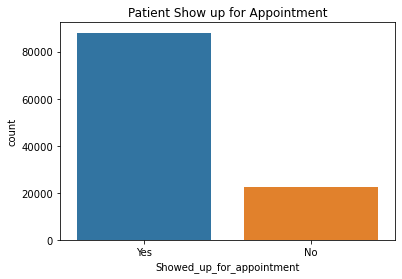

In [196]:
fig = sns.countplot(x="Showed_up_for_appointment", data=df)
fig.set_title("Patient Show up for Appointment")
plt.show()

The above chart shows the distribution of those who showed up for appointment and those who didn't. From the chart, it is obvious that those who came for the appointment out-number those who didn't.

##### Appointment show up based on Age Distribution

Text(0.5, 1.0, 'Appointment Show up Based on Age Distribution')

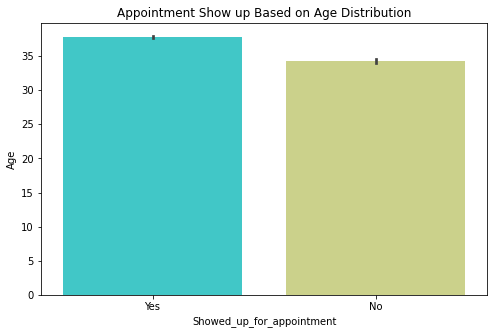

In [160]:
plt.figure(figsize=(8,5))
sns.barplot(x = "Showed_up_for_appointment", y = "Age", data = df, palette = "rainbow")
plt.title("Appointment Show up Based on Age Distribution")

The above chart shows there is no much difference in age amongst those who showed up and those who did not show up for appointments.

##### Appointment Show up based on Age, separated by Scholarship status

Text(0.5, 1.0, 'Appointment Show up based on Age, separated by Scholarship status')

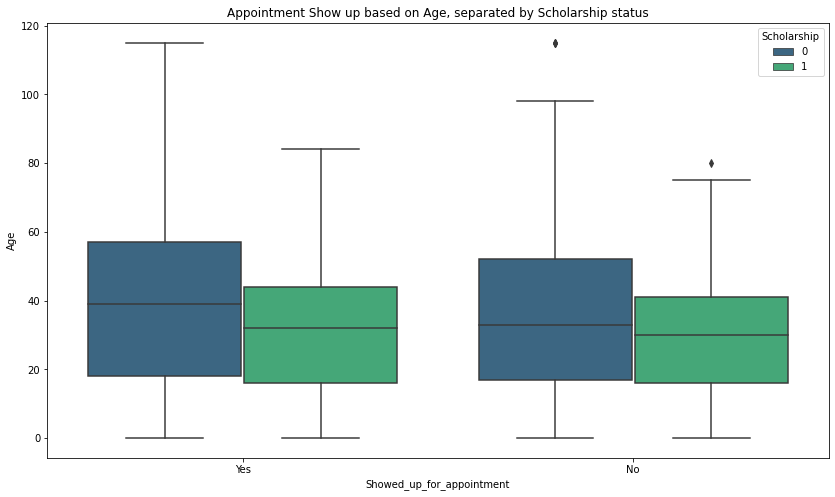

In [206]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Showed_up_for_appointment", 
              y="Age", 
              hue="Scholarship",
              data=df,
             palette = "viridis")

plt.title("Appointment Show up based on Age, separated by Scholarship status")


The above plot shows that amongst those who didn't have scholarships, the median age of those who showed up and those who didn't show up for appointment was about same. Thesame applies to those with scholarship.

With the exclusion of some few outliers amongst those who didn't show up for appointment and didn't have scholarship, the age distribution was almost normal.

##### Appointment show up based on Age, amongst handicapped patients

Text(0.5, 1.0, 'Appointment Show up based on Age, separated by Handicap status')

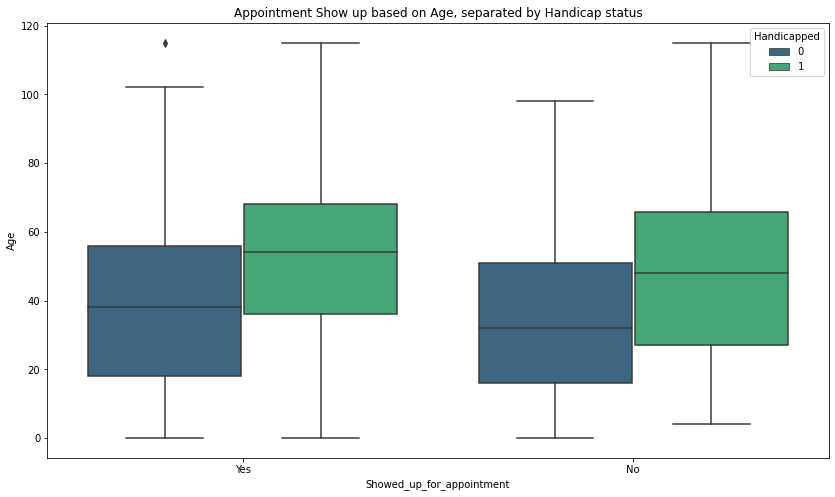

In [207]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Showed_up_for_appointment", 
              y="Age", 
              hue="Handicapped",
              data=df,
             palette = "viridis")

plt.title("Appointment Show up based on Age, separated by Handicap status")

From the above chart, the oldest of the patients are those handicapped with the median age of those who showed up for appointment being around 58 years. The median age of those non handicapped patients who didn't show up was about 36 years. those patients with Handicap who showed up for appointments averagely are older. The youngest age groups (starting from zero) had litle or no difference amongst the categories.

##### Appointment show up based on Age, separated by Alcolism status

Text(0.5, 1.0, 'Appointment Show up based on Age, separated by Alcoholism status')

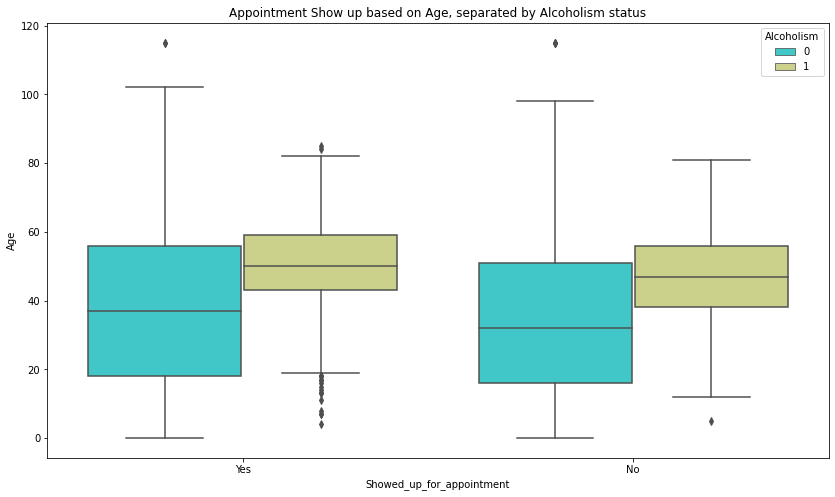

In [211]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Showed_up_for_appointment", 
              y="Age", 
              hue="Alcoholism",
              data=df,
             palette = "rainbow")

plt.title("Appointment Show up based on Age, separated by Alcoholism status")

The chart shows that highest age of those with alcoholims who showed up for appointment was about 60 years. Also most people who visited the hospital didn't have alcoholim issue. Amongst those with alcoholims, the minimum age was about 18 years, excluding the possible outliers. 

##### Appointment Show up based on Age, separated by Hypertensive status

Text(0.5, 1.0, 'Appointment Show up based on Age, separated by Hypertensive status')

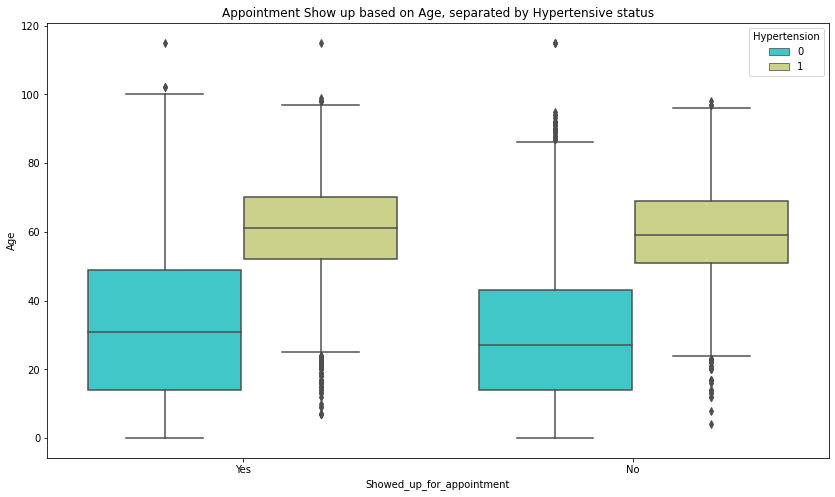

In [208]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Showed_up_for_appointment", 
              y="Age", 
              hue="Hypertension",
              data=df,
             palette = "rainbow")

plt.title("Appointment Show up based on Age, separated by Hypertensive status")

The age distribution amongst amongst hypertensives who showed compared to those who didnt show up for appointments has wide variations with outliers. Those without hypertension had a lower median age while those with hypertension had a comparatively higher median age, with the latter also having a lot of outliers This is to be expected especially amongst a population with essential hypertension in which risk tends to increase with increasing age. 

Rather surprisingly however, there seems to be a significant number of hypertension amongst the young too with the minimum age being about 21 years.

Text(0.5, 1.0, 'Appointment Show up based on Age, separated by Scholarship status')

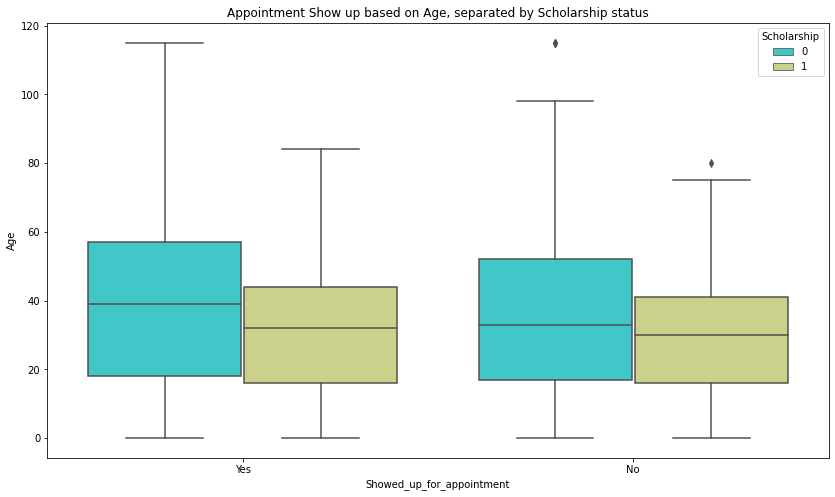

In [209]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Showed_up_for_appointment", 
              y="Age", 
              hue="Scholarship",
              data=df,
             palette = "rainbow")

plt.title("Appointment Show up based on Age, separated by Scholarship status")

The above chart shows that the scholarship status didn't seem to affect the showing up for appointment as the median age amongst all the categories was about 35 to 39 years. Also most of the patients who showed up for appointment are those without scholarships.

##### Distribution of Patients based on Neighboorhood

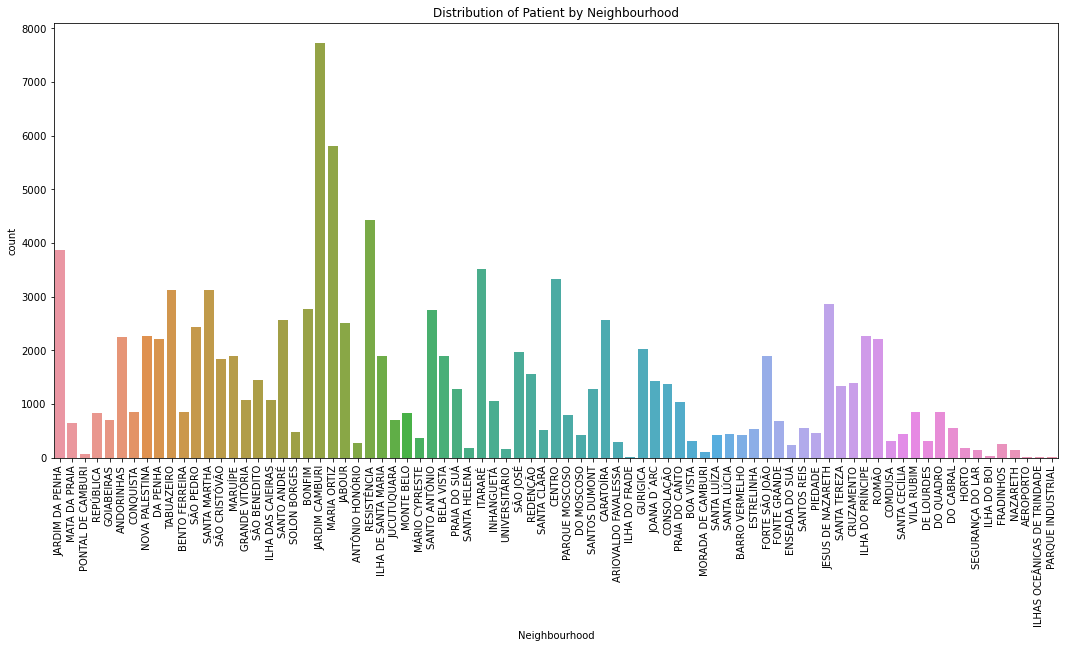

In [176]:
fig = plt.figure(figsize=(18, 8))
fig = sns.countplot(x=df.Neighbourhood, data=df)
plt.xticks(rotation="vertical")
fig.set_title("Distribution of Patient by Neighbourhood")

plt.show()

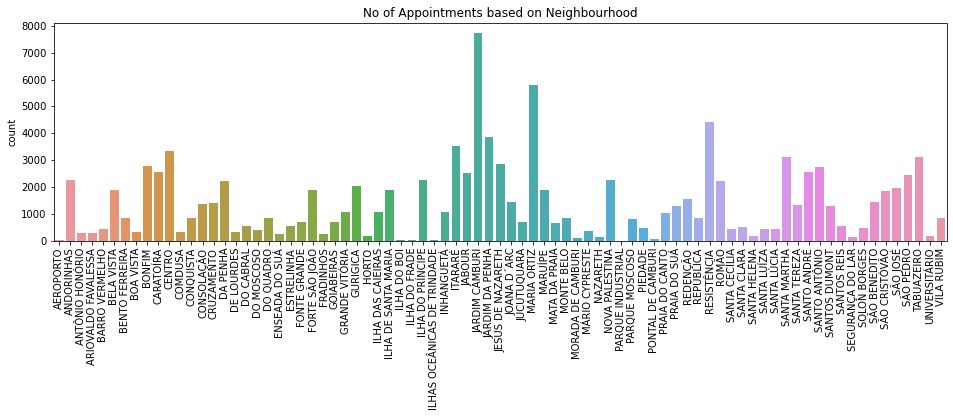

In [77]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments based on Neighbourhood")
plt.show()

# No of appointments by Neighboorhod

From the two charts above, the Neighbourhood with the most patients at the hospital was `JARDIM CAMBURI`.

##### No of Appointments based on Age

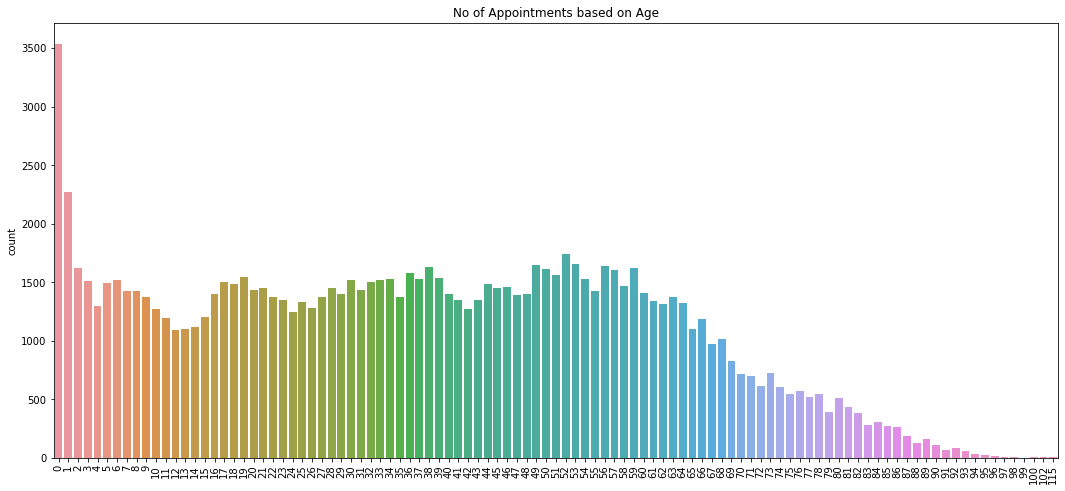

In [210]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Age))
ax.set_title("No of Appointments based on Age")
plt.show()

# No of appointments by Neighboorhod

The chart above showed that most patients visiting the hospital for appointments are in pediatric age group with a gradual decline in visits by older age patients from 60 years and above.

###### Patient Hypertensive Status

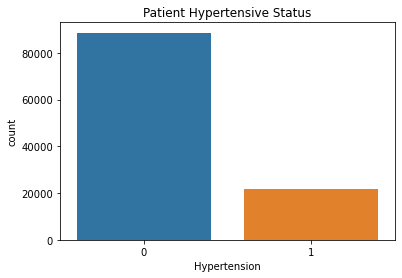

In [79]:
fig = sns.countplot(x=df.Hypertension, data=df)
fig.set_title("Patient Hypertensive Status")
plt.show()

The chart above showed most of the patients visiting the hospital are non-hypertensive. This is to be expected since essential hypertension risk increases with increasing age. Moreso from the chart of the age distribution above, majority of the patienst belong to the pediatric age group.

##### Gender Based Distribution of the Patients

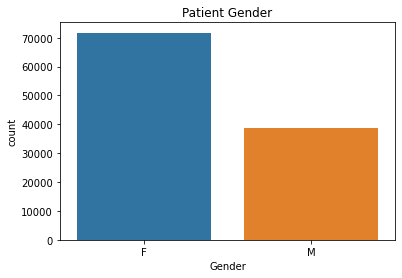

In [80]:
fig = sns.countplot(x=df.Gender, data=df)
fig.set_title("Patient Gender")
plt.show()

The above chart shows the distribution of the patients based on Gender. From the chart, it is obvious that the femaile patients are more than the males, (almost twice the number of males).

#### Distribution of Patients based on Diabetic status

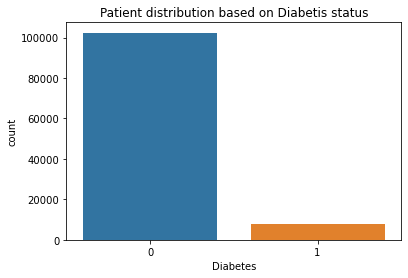

In [81]:
fig = sns.countplot(x=df.Diabetes, data=df)
fig.set_title("Patient distribution based on Diabetis status")
plt.show()

The above chart shows the distribution of the patients based on Diabetes. From the chart, it is obvious that majority of patients are the  non-diabetics. The non-diabetics make up a very high percentage of the total patients. This is similar to
what was observed for the Hypertensive distribution of the patients in the previously shown chart above. 

##### Distribution based on Handicap Status

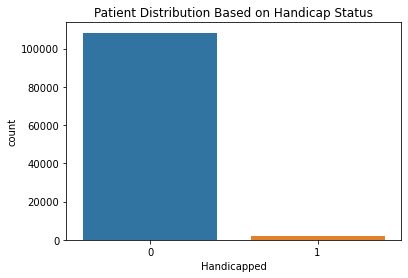

In [82]:
fig = sns.countplot(x=df.Handicapped, data=df)
fig.set_title("Patient Distribution Based on Handicap Status")
plt.show()

From the above chart, the patients without handicap are more than those with handicap.


### Research Question 1 Does having scholarship affect the hospital visits and showing up of patients for appointments?

##### Scholarship Vs Showing Up for Appointments

In [83]:
df[["Scholarship","Showed_up_for_appointment"]].value_counts(normalize = True)

Scholarship  Showed_up_for_appointment
0            Yes                          0.723150
             No                           0.178569
1            Yes                          0.074923
             No                           0.023358
dtype: float64

##### Insights

From the above results, 72% of those without scholarships showed up for their appointments while only 7.5% of those with scholarships showed up for appointments.

Amongst those with scholarship, 7.5% showed up for appointment while 2.3% did not.

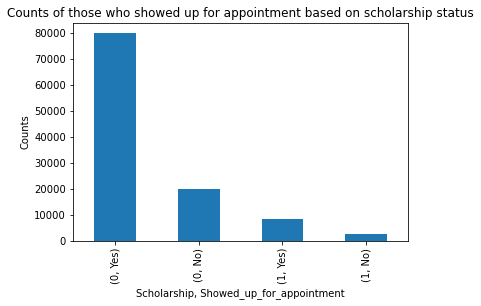

In [84]:
df[["Scholarship","Showed_up_for_appointment"]].value_counts().plot(kind="bar", \
title="Counts of those who showed up for appointment based on scholarship status")
plt.xlabel("Scholarship, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

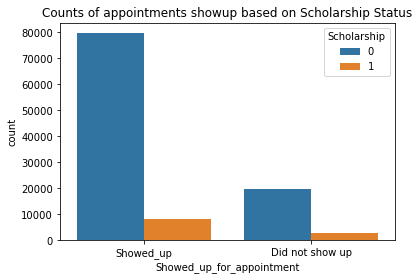

In [85]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.Scholarship, data=df)
fig.set_title("Counts of appointments showup based on Scholarship Status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()


The charts above further confirms that those without scholarship constitute majority of those who showed up for appointments. A small percentage of those with scholarships actually showed up for their appointments.

### Research Question 2: Does Gender of the patient have any effect on the showing up for hospital appointments

##### Gender Vs Showing up for Appointment

##### Identify the number of males and females who showed up for appointments

In [86]:
df[["Gender","Showed_up_for_appointment"]].value_counts()

Gender  Showed_up_for_appointment
F       Yes                          57162
M       Yes                          30887
F       No                           14568
M       No                            7710
dtype: int64

From the above result, females showed up for appointments more than males did. In addition, more females than males didn't show up for appointments.

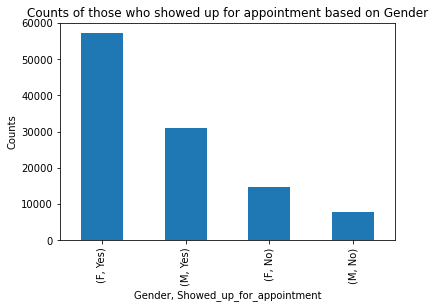

In [87]:
df[["Gender","Showed_up_for_appointment"]].value_counts().plot(kind="bar", \
title="Counts of those who showed up for appointment based on Gender")
plt.xlabel("Gender, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

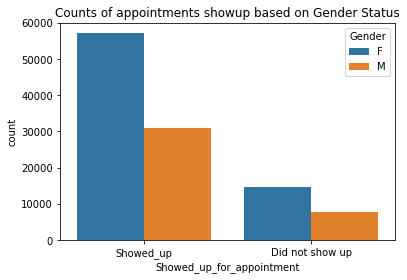

In [88]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.Gender, data=df)
fig.set_title("Counts of appointments showup based on Gender Status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()


The two charts above show that more females showed up for appointments compared to males.Generally more people showed up for appointment than those who didn't. More females failed to show up for appointment compared to females.

### Research Question 3  Does having any of the chronic diseases/conditions listed in the description above (hypertension, diabetes,alcoholism, handicap) affect the hospital visits and showing up of patients for appointments?

##### Hypertension Vs Showed up for Appointment

In [89]:
df[["Hypertension","Showed_up_for_appointment"]].value_counts()

Hypertension  Showed_up_for_appointment
0             Yes                          70081
              No                           18530
1             Yes                          17968
              No                            3748
dtype: int64

63.5% (70, 178) of the non-hypertensive patients showed up for their appointments. While only 16.3% (18, 029) of the hypertensive patients showed up.

Also majority of those with hypertension (17, 968) showed up for appointment compare to those who didnt show up (3, 748).

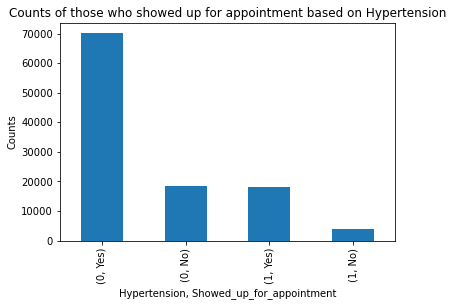

In [90]:
df[["Hypertension","Showed_up_for_appointment"]].value_counts().plot(kind="bar", \
title="Counts of those who showed up for appointment based on Hypertension")
plt.xlabel("Hypertension, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

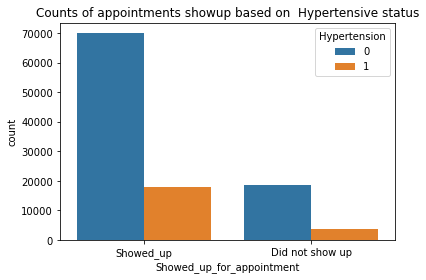

In [91]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.Hypertension, data=df)
fig.set_title("Counts of appointments showup based on  Hypertensive status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()

The two charts shows that many of those who showed up for appointments didn't have hypertension issues. From the charts it is obvious that number of those without hypertension who didn't show up for appointment and those with hypertension who showed up for appointment is about thesame. Generally however, more hypertensives showed up for appointments compared to thos hypertensives who didn't show up.

##### Diabetes Vs Showed up for Appointment

In [92]:
df[["Diabetes","Showed_up_for_appointment"]].value_counts()

Diabetes  Showed_up_for_appointment
0         Yes                          81571
          No                           20856
1         Yes                           6478
          No                            1422
dtype: int64

73.9% (81, 695) patients without diabetes showed up for appointment while only 5.9% (6. 513) patients with diabetes showed up for appointment.

Amongst the diabetics, those who showed up (6, 478) are more than those who didn't show up (1, 422) for appointments.

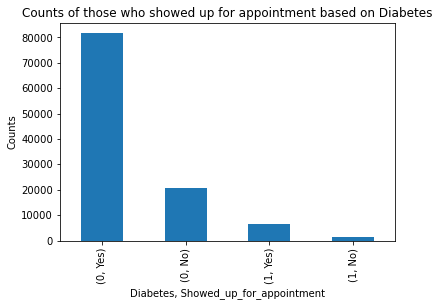

In [93]:
df[["Diabetes","Showed_up_for_appointment"]].value_counts().plot(kind="bar", \
title="Counts of those who showed up for appointment based on Diabetes")
plt.xlabel("Diabetes, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

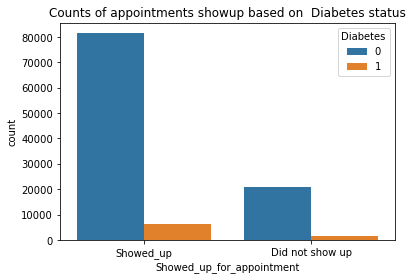

In [94]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.Diabetes, data=df)
fig.set_title("Counts of appointments showup based on  Diabetes status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()

From the charts above, the number of non-diabeteics who showed up are more that those diabetics who didn't show up for appointments.

Amongst the diabetics, those who showed up are a little more than those who did not.

##### Alcoholism Vs Show up for Appointment

In [95]:
df[["Alcoholism","Showed_up_for_appointment"]].value_counts()

Alcoholism  Showed_up_for_appointment
0           Yes                          85372
            No                           21603
1           Yes                           2677
            No                             675
dtype: int64

77.4% (85, 525) patients without alcoholism problem showed up for appointment while only 2.4% (2, 683) patients with alcoholism showed up for appointment.

Amongst those with alcoholism, those who showed up for appointment (2, 677) are more than those who did not (675).

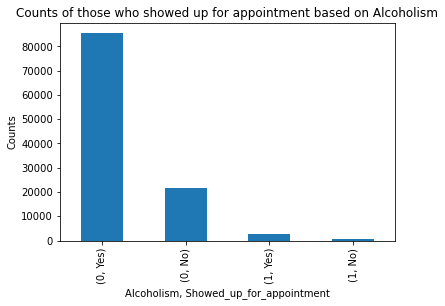

In [96]:
df[["Alcoholism","Showed_up_for_appointment"]].value_counts().plot(kind="bar",\
title="Counts of those who showed up for appointment based on Alcoholism")
plt.xlabel("Alcoholism, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

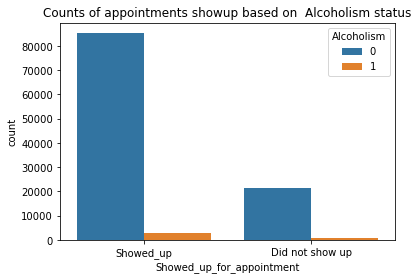

In [97]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.Alcoholism, data=df)
fig.set_title("Counts of appointments showup based on  Alcoholism status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()

The two charts above indicate that those without alcoholism turned up for their appointments more than those with alcoholism. Comparatively, very few of those with alcoholism came for their appointments.

##### Handicapped Vs Show up for Appointment

In [98]:
df[["Handicapped","Showed_up_for_appointment"]].value_counts()

Handicapped  Showed_up_for_appointment
0            Yes                          86373
             No                           21912
1            Yes                           1676
             No                             366
dtype: int64

The results show that majority of those who came for appointments are non-handicapped (86, 373). A comparatively lower number of patients with handicap came for appointments (1, 676) but are more than those with handicap who did not come (366).

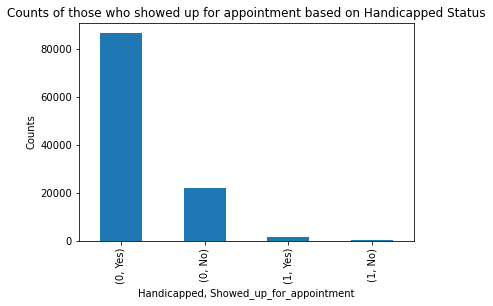

In [99]:
df[["Handicapped","Showed_up_for_appointment"]].value_counts().plot(kind="bar",\
title="Counts of those who showed up for appointment based on Handicapped Status")
plt.xlabel("Handicapped, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

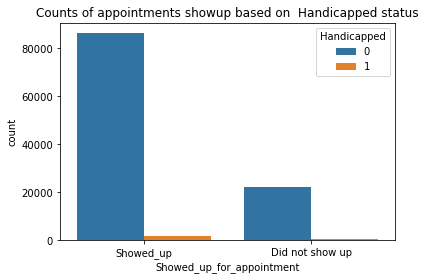

In [100]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.Handicapped, data=df)
fig.set_title("Counts of appointments showup based on  Handicapped status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()

The two charts above show that those without handicap constitute majority of those who showed up for appointment while very few handicapped showed up for appointments.

###### Neighbourhood Vs Showed_up_for_appointment

Let us count the total number of Neighbourhoods the patients come from.

In [101]:
df.Neighbourhood.unique().size

81

The above result shows that the patients come from a total of 81 neighbourhoods.

In [102]:
df[["Neighbourhood","Showed_up_for_appointment"]].value_counts().sort_values()

Neighbourhood                Showed_up_for_appointment
AEROPORTO                    No                              1
PARQUE INDUSTRIAL            Yes                             1
ILHAS OCEÂNICAS DE TRINDADE  No                              2
ILHA DO FRADE                No                              2
ILHA DO BOI                  No                              3
                                                          ... 
CENTRO                       Yes                          2629
JARDIM DA PENHA              Yes                          3241
RESISTÊNCIA                  Yes                          3517
MARIA ORTIZ                  Yes                          4586
JARDIM CAMBURI               Yes                          6252
Length: 160, dtype: int64

From the above results, it is obvious that patients from the `JARDIM CAMBURI` neighbourhood showed up for hospital appointments the most.

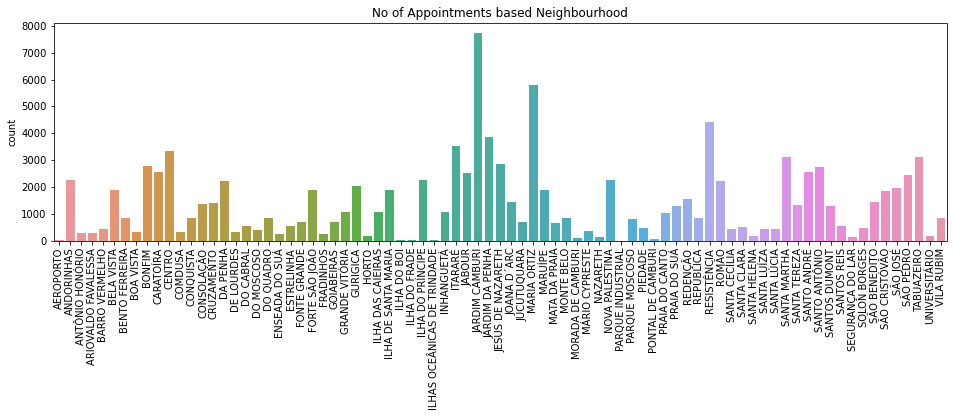

In [112]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments based Neighbourhood")
plt.show()

# No of appointments by Neighboorhod

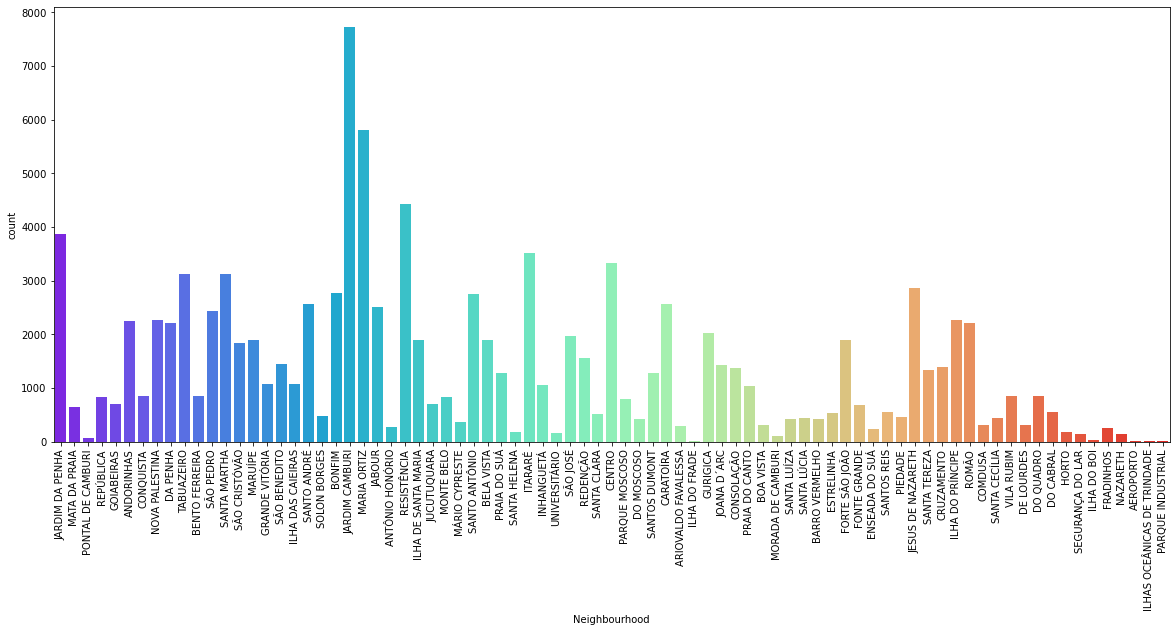

In [185]:
fig = plt.figure(figsize=(20,8))
sns.countplot( x = df["Neighbourhood"], data = df, palette="rainbow" )
plt.xticks(rotation="vertical")
plt.show()

Chart also confirms that most patients are from `JARDIM CAMBURI` neighbourhood.

### Research Question 6: Does sending out SMS reminder messages to patients influence how they turn up for hospital appointments?

##### SMS Received Vs Show up for Appointment

In [106]:
df[["SMS_received","Showed_up_for_appointment"]].value_counts()

SMS_received  Showed_up_for_appointment
0             Yes                          62389
1             Yes                          25660
0             No                           12503
1             No                            9775
dtype: int64

56.6% (62, 510) patients who didn't recieve SMS turned up for their appointments while 23.3% (25, 698) of pateints who received SMS showed up for appointment. A higher number of people who received an SMS showed up compared to those who received an SMS and didn't show up.

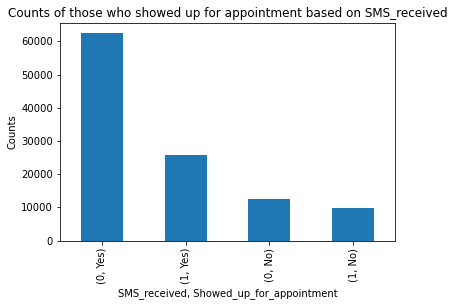

In [107]:
df[["SMS_received","Showed_up_for_appointment"]].value_counts().plot(kind="bar",\
title="Counts of those who showed up for appointment based on SMS_received")
plt.xlabel("SMS_received, Showed_up_for_appointment")
plt.ylabel("Counts")

plt.show()

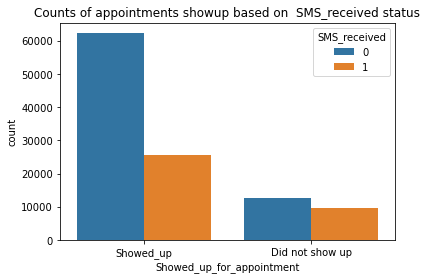

In [108]:
fig = sns.countplot(x=df.Showed_up_for_appointment, hue=df.SMS_received, data=df)
fig.set_title("Counts of appointments showup based on  SMS_received status")
x_ticks_labels=["Showed_up", "Did not show up"]
fig.set_xticklabels(x_ticks_labels)
plt.show()

The two charts above shows that those who didn't receive sms showed up more for appointments, making up about double the number of those recieved sms and showed up. There is also a higher number of people who received an SMS and showed up compared to those who received an SMS and didn't show up.

#### Question 7 Did Delay time Affect the Showing up for Appointments

In [217]:
df[["Delay_time","Showed_up_for_appointment"]].sort_values(by="Delay_time")

,Delay_time,Showed_up_for_appointment
71533,-7 days +10:10:40,No
55226,-2 days +09:09:19,No
64175,-2 days +10:16:02,No
27033,-2 days +13:08:07,No
72362,-2 days +17:09:03,No
...,...,...
102786,178 days 13:16:26,Yes
102799,178 days 13:16:43,Yes
102796,178 days 13:16:59,Yes
102797,178 days 13:17:18,Yes


The above result shows that the delay time between scheduling for appointments and the actual appointments was between 10 hours tp 178 days, with patinets in both extremes of delay time not shoing up for their appointment. Even amongst those with long delay time, we can still see that some showed up for appointments.

In [105]:
df[["Delay_time","Showed_up_for_appointment"]].value_counts()

Delay_time         Showed_up_for_appointment
13 days 06:42:14   No                           21
34 days 06:41:33   No                           20
-1 days +16:50:07  No                           16
6 days 06:42:37    No                           16
-1 days +15:41:36  No                           15
                                                ..
3 days 07:03:17    Yes                           1
3 days 07:02:53    No                            1
3 days 07:01:25    Yes                           1
3 days 07:01:23    Yes                           1
178 days 13:19:01  No                            1
Length: 91578, dtype: int64

From the above result, it is obvious that amongst those who did not show up for appointment, the maximum delay time was 178 days.

Likewise amongst those who showed for appointment, the maximum wait time was 3 days.

The above results indicate that amongst those who didnt show up for appointment, the maximum delay time was 13 days and the minimum was 15 hours.


While amongst those who showed up for appointment, the maximum delay time was 178 days and the minimum was 3 days. 

The delay time of 178 days resulted in only no patient showing up for appointment. The delay time seems to negatively influence the showing up for appointment.

<a id='conclusions'></a>
## Conclusions

The analysis conducted on this data suggests the following:

1. Having no scholarship is likely not to affect showing up at the hospital for appointments.

2. Although more females showed up for appointments compared to males, the female gender also didn't show up for appointment more than the males. Hence I can't say with certainty that gender affected the rate of showing up at the hospital. Furthermore, the dataset is skewed in favour of females because there are more males than females. This may affect the outcome of any conclusions one can make from the analysis.

3. Amongst the chronic diseases of hypertension and diabetes, the former seemed to affect showing up for appointments more than the later. Amongst those with these chronic diseases who showed up for appointment, hypertension accounted for 17, 968 patients while diabetes accounted for 6, 478 cases. Hypertension can thus be said to have more influence on the rate of show up at the hospital.

4. Amongst those with other health related conditions such as alcoholism and handicap, the former also accounted more (2, 677) for show up at the hospital compared to the latter (1, 676) although the difference isn't much. 

5. The delay time calculated from the difference between Appointment day and scheduled day seem to influence show up at the hospital as those who have longer delay time didn't show up for their appointment at the hospital.

6. There is a larger number of patients who receieved SMS and showed up for appointment (25, 660) compared to those who receieved SMS and did not show up (9, 775). SMS receival could thus be said to have some effect on the rate of show up at the hospital.



### Limitations

1. Most of our data are qualitative data (except for the Age column) and not quantitative. This limits the extent to which we can perform statistical analysis to make inferences from formulated hypothesis.


2. Our analysis was thus majorly descriptive and not inferential. We cannot draw any inferences from the dataset.

3. We are also constrained by paucity of details regarding the dataset. For example:

- The scholarship status doesn't seem to affect the show-up at the hospital. No information was provided about the cost/financial benefits of such scholarships or the scope of care to be covered under it. Therefore, we cannot say if this could have been a likely reason for the observation made above.

- The SMS_recieved group is also affected by this limitation. For instance, we can't tell what criteria was used in deciding who to send an SMS to, the content of the SMS (it could be even unrelated to the scheduled patient appointments) and when the messages were sent out (before or after the scheduled or appointment days).

4. We couldn't measure for correlation because the dataset contained mainly qualitative data.

5. The available data couldn't be used to explain some of the observations made on the dataset. For example, we would expect that those with scholarship would show up more for appointments but the data indicated otherwise.

## Submitting your Project 

In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

### Some References

https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

https://github.com/jupyter/jupyter/wiki

https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Top_Python_Libraries_Used_In_Data%C2%A0Science.ipynb

https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Data_Cleaning/Data_Cleaning_using_Python_with_Pandas_Library.ipynb

https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://datacamp.com

https://udacity.com